In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data_centers = pd.read_csv("data_centers_numeric_imputed.csv", usecols=['country', 'total_data_centers', 'hyperscale_data_centers',
                                                        'colocation_data_centers', 'floor_space_sqft_total',
                                                        'power_capacity_MW_total', 'average_renewable_energy_usage_percent',
                                                        'tier_distribution',
                                                        'internet_penetration_percent','growth_rate_of_data_centers_percent_per_year',
                                                        'cooling_technologies_common']) # cut out 2 more categorical columns
data_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    int64  
 2   hyperscale_data_centers                       191 non-null    int64  
 3   colocation_data_centers                       191 non-null    int64  
 4   floor_space_sqft_total                        191 non-null    float64
 5   power_capacity_MW_total                       191 non-null    float64
 6   average_renewable_energy_usage_percent        191 non-null    float64
 7   tier_distribution                             179 non-null    object 
 8   internet_penetration_percent                  191 non-null    float64
 9   growth_rate_of_data_centers_percent_per_year  191 non-null    flo

In [23]:
print(f"Skewness: {data_centers['total_data_centers'].skew():.3f}")
print(f"Skewness: {data_centers['hyperscale_data_centers'].skew():.3f}")
print(f"Skewness: {data_centers['colocation_data_centers'].skew():.3f}")
print(f"Skewness: {data_centers['internet_penetration_percent'].skew():.3f}")
print(f"Skewness: {data_centers['growth_rate_of_data_centers_percent_per_year'].skew():.3f}")
print(f"Skewness: {data_centers['floor_space_sqft_total'].skew():.3f}")
print(f"Skewness: {data_centers['power_capacity_MW_total'].skew():.3f}")
print(f"Skewness: {data_centers['average_renewable_energy_usage_percent'].skew():.3f}")

Skewness: 12.961
Skewness: 11.315
Skewness: 10.669
Skewness: -0.694
Skewness: 2.820
Skewness: 13.177
Skewness: 8.941
Skewness: 0.202


In [24]:
from scipy.stats import boxcox, yeojohnson
transformations = {
    'log': np.log1p(data_centers['floor_space_sqft_total']),
    'sqrt': np.sqrt(data_centers['floor_space_sqft_total'])
}

for name, transformed in transformations.items():
    print(f"{name}: skewness = {transformed.skew():.3f}")

log: skewness = -0.739
sqrt: skewness = 8.968


In [25]:
import numpy as np

# List of all columns to check
columns_to_check = [
    'total_data_centers',
    'hyperscale_data_centers',
    'colocation_data_centers',
    'internet_penetration_percent',
    'growth_rate_of_data_centers_percent_per_year',
    'floor_space_sqft_total',
    'power_capacity_MW_total',
    'average_renewable_energy_usage_percent'
]

# Create a copy to avoid modifying original during testing
data_centers_transformed = data_centers.copy()

print("=" * 60)
print("SKEWNESS ANALYSIS AND TRANSFORMATION")
print("=" * 60)

# Track which columns were transformed
transformed_columns = []

for col in columns_to_check:
    original_skew = data_centers[col].skew()
    
    # Apply log transformation if skewness > 1 or < -1
    if abs(original_skew) > 1:
        # Apply log transformation
        data_centers_transformed[col] = np.log1p(data_centers_transformed[col])
        new_skew = data_centers_transformed[col].skew()
        
        # Check if transformation helped
        if abs(new_skew) < abs(original_skew):
            print(f"\n✓ {col}:")
            print(f"   Original: {original_skew:.3f} → Transformed: {new_skew:.3f}")
            transformed_columns.append(col)
        else:
            # Revert if it made things worse
            data_centers_transformed[col] = data_centers[col]
            print(f"\n✗ {col}:")
            print(f"   Original: {original_skew:.3f} → Log made it worse, keeping original")
    else:
        print(f"\n○ {col}:")
        print(f"   Skewness: {original_skew:.3f} (no transformation needed)")

print("\n" + "=" * 60)
print(f"SUMMARY: Transformed {len(transformed_columns)} columns")
print("=" * 60)
print("Transformed columns:", transformed_columns)

# Replace original dataframe with transformed version
data_centers = data_centers_transformed

# Verify final skewness
print("\n" + "=" * 60)
print("FINAL SKEWNESS VALUES")
print("=" * 60)
for col in columns_to_check:
    print(f"{col}: {data_centers[col].skew():.3f}")

SKEWNESS ANALYSIS AND TRANSFORMATION

✓ total_data_centers:
   Original: 12.961 → Transformed: 1.130

✓ hyperscale_data_centers:
   Original: 11.315 → Transformed: 3.027

✓ colocation_data_centers:
   Original: 10.669 → Transformed: 0.933

○ internet_penetration_percent:
   Skewness: -0.694 (no transformation needed)

✓ growth_rate_of_data_centers_percent_per_year:
   Original: 2.820 → Transformed: -0.494

✓ floor_space_sqft_total:
   Original: 13.177 → Transformed: -0.739

✓ power_capacity_MW_total:
   Original: 8.941 → Transformed: 0.511

○ average_renewable_energy_usage_percent:
   Skewness: 0.202 (no transformation needed)

SUMMARY: Transformed 6 columns
Transformed columns: ['total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers', 'growth_rate_of_data_centers_percent_per_year', 'floor_space_sqft_total', 'power_capacity_MW_total']

FINAL SKEWNESS VALUES
total_data_centers: 1.130
hyperscale_data_centers: 3.027
colocation_data_centers: 0.933
internet_penetration_pe

In [26]:
data_centers.head()

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common
0,United States,8.599142,5.707110,7.601402,21.990777,9.392745,27.00,"I:5%, II:15%, III:60%, IV:20%",92.0,2.564949,"Air, Liquid, Immersion"
1,Germany,6.272877,3.931826,5.303305,19.673444,7.601402,40.00,"II:10%, III:70%, IV:20%",92.0,2.197225,"Air, Indirect Evap."
2,United Kingdom,6.261492,3.433987,5.017280,19.113828,6.908755,0.45,"II:15%, III:70%, IV:15%",96.0,2.079442,"Air, Free Cooling"
3,China,6.109248,4.615121,6.908755,20.030119,8.987322,0.25,"II:20%, III:60%, IV:20%",76.0,2.772589,"Air, Liquid"
4,France,5.777652,3.044522,4.709530,18.603002,6.552508,40.00,"II:20%, III:70%, IV:10%",91.0,1.945910,"Air, Liquid"


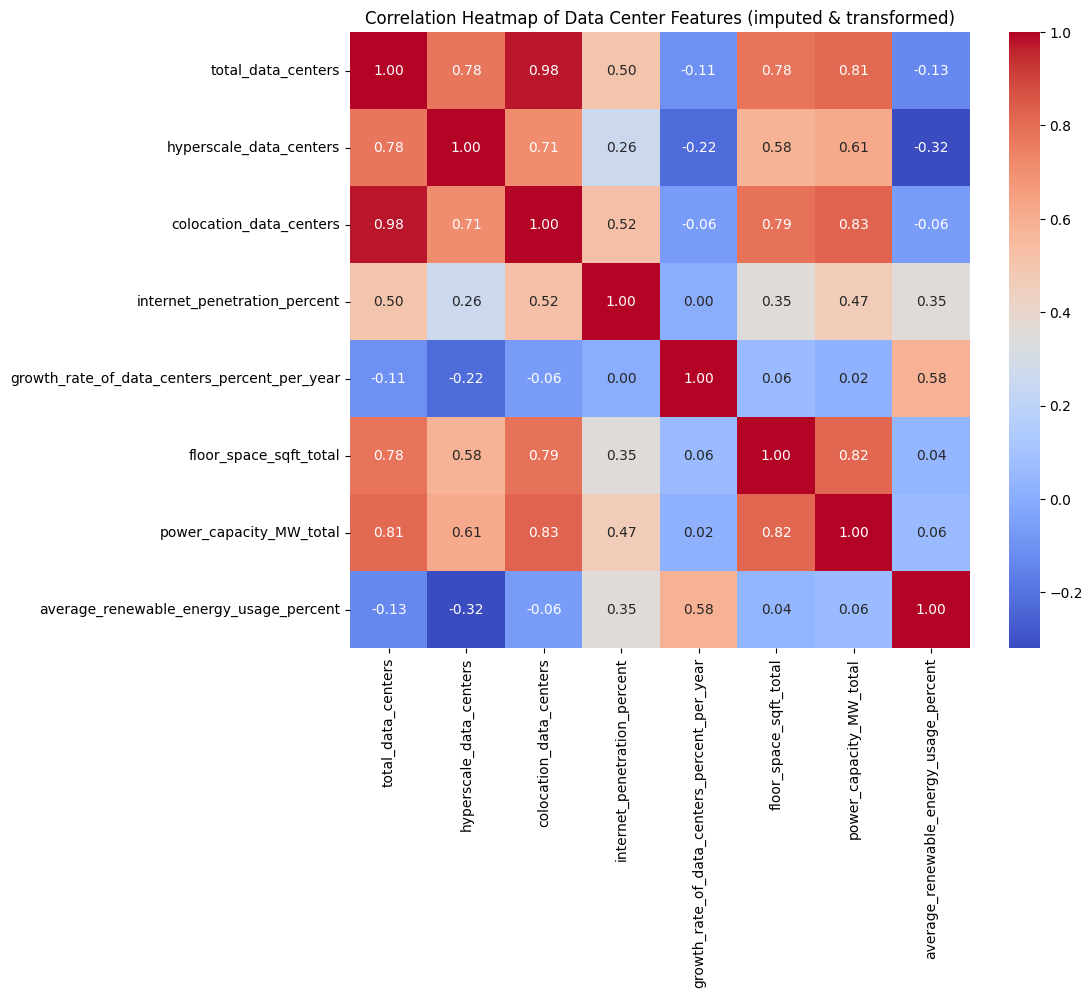

In [27]:
cols = ['total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers',
        'internet_penetration_percent', 'growth_rate_of_data_centers_percent_per_year', 'floor_space_sqft_total',
        'power_capacity_MW_total', 'average_renewable_energy_usage_percent']
correlation = data_centers[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Data Center Features (imputed & transformed)")
plt.show()

In [28]:
import re
def extract_tier_info(tier_str):
    if pd.isna(tier_str):
        return pd.Series({
            'tier_I': np.nan, 
            'tier_II': np.nan, 
            'tier_III': np.nan, 
            'tier_IV': np.nan,
            'has_tier_info': 0
        })
    
    tier_str = str(tier_str)
    tiers = {'tier_I': 0, 'tier_II': 0, 'tier_III': 0, 'tier_IV': 0, 'has_tier_info': 0}
    
    has_any_tier = bool(re.search(r'\bTier\b|\bI{1,4}\b[:\-–]', tier_str, re.IGNORECASE))
    
    if not has_any_tier:
        return pd.Series({
            'tier_I': np.nan, 
            'tier_II': np.nan, 
            'tier_III': np.nan, 
            'tier_IV': np.nan,
            'has_tier_info': 0
        })
    
    tiers['has_tier_info'] = 1
    
    tier_1_pct = re.search(r'\bI\s*:\s*(\d+)\s*%', tier_str)
    tier_2_pct = re.search(r'\bII\s*:\s*(\d+)\s*%', tier_str)
    tier_3_pct = re.search(r'\bIII\s*:\s*(\d+)\s*%', tier_str)
    tier_4_pct = re.search(r'\bIV\s*:\s*(\d+)\s*%', tier_str)
    
    if tier_1_pct:
        tiers['tier_I'] = int(tier_1_pct.group(1))
    if tier_2_pct:
        tiers['tier_II'] = int(tier_2_pct.group(1))
    if tier_3_pct:
        tiers['tier_III'] = int(tier_3_pct.group(1))
    if tier_4_pct:
        tiers['tier_IV'] = int(tier_4_pct.group(1))
    
    if any([tier_1_pct, tier_2_pct, tier_3_pct, tier_4_pct]):
        return pd.Series(tiers)
    
    
    if re.search(r'\bTier\s*I\b(?!I)|\bTier\s*1\b', tier_str, re.IGNORECASE):
        tiers['tier_I'] = 1
    if re.search(r'\bTier\s*II\b(?!I)|\bTier\s*2\b', tier_str, re.IGNORECASE):
        tiers['tier_II'] = 1
    if re.search(r'\bTier\s*III\b(?!I)|\bTier\s*3\b', tier_str, re.IGNORECASE):
        tiers['tier_III'] = 1
    if re.search(r'\bTier\s*IV\b|\bTier\s*4\b', tier_str, re.IGNORECASE):
        tiers['tier_IV'] = 1
    
    return pd.Series(tiers)

tier_info = data_centers['tier_distribution'].apply(extract_tier_info)
data_centers[['tier_I', 'tier_II', 'tier_III', 'tier_IV', 'has_tier_info']] = tier_info

for tier_col in ['tier_I', 'tier_II', 'tier_III', 'tier_IV']:
    median_val = data_centers.loc[
        data_centers['has_tier_info'] == 1, tier_col
    ].median()
    data_centers[tier_col] = data_centers[tier_col].fillna(median_val)

print("\n Tier distribution extracted and imputed")
print(f"  Rows with actual tier info: {data_centers['has_tier_info'].sum()}")
print(f"  Rows imputed with median: {(data_centers['has_tier_info'] == 0).sum()}")


def count_cooling_tech(cooling_str):
    if pd.isna(cooling_str):
        return np.nan
    return len(str(cooling_str).split(','))

data_centers['num_cooling_technologies'] = (
    data_centers['cooling_technologies_common'].apply(count_cooling_tech)
)

median_cooling = data_centers['num_cooling_technologies'].median()
data_centers['num_cooling_technologies'] = (
    data_centers['num_cooling_technologies'].fillna(median_cooling)
)

print("\n Cooling technologies counted and imputed")
print(f"  Median number of cooling technologies: {median_cooling}")

data_centers = data_centers.drop(columns=['tier_distribution', 'cooling_technologies_common'])


 Tier distribution extracted and imputed
  Rows with actual tier info: 163.0
  Rows imputed with median: 28

 Cooling technologies counted and imputed
  Median number of cooling technologies: 3.0


In [29]:
print(data_centers["country"].dtype)
print(data_centers["country"].unique())
print("len of unique:", len(data_centers["country"].unique()))

object
['United States' 'Germany' 'United Kingdom' 'China' 'France' 'Canada'
 'Australia' 'Netherlands' 'Russia' 'Japan' 'Brazil' 'Singapore'
 'South Africa' 'India' 'Mexico' 'Sweden' 'Indonesia' 'Spain' 'Poland'
 'Switzerland' 'Afghanistan' 'Albania ' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Comoros'
 'Congo, Democratic Republic of the' 'Congo, Republic of the' 'Costa Rica'
 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guin

In [30]:
region_mapping = {
    # North America (3 countries)
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    
    # Latin America (32 countries)
    'Argentina': 'Latin America',
    'Antigua and Barbuda': 'Latin America',
    'Bahamas': 'Latin America',
    'Barbados': 'Latin America',
    'Belize': 'Latin America',
    'Bolivia': 'Latin America',
    'Brazil': 'Latin America',
    'Chile': 'Latin America',
    'Colombia': 'Latin America',
    'Costa Rica': 'Latin America',
    'Cuba': 'Latin America',
    'Dominica': 'Latin America',
    'Dominican Republic': 'Latin America',
    'Ecuador': 'Latin America',
    'El Salvador': 'Latin America',
    'Grenada': 'Latin America',
    'Guatemala': 'Latin America',
    'Guyana': 'Latin America',
    'Haiti': 'Latin America',
    'Honduras': 'Latin America',
    'Jamaica': 'Latin America',
    'Nicaragua': 'Latin America',
    'Panama': 'Latin America',
    'Paraguay': 'Latin America',
    'Peru': 'Latin America',
    'Saint Kitts and Nevis': 'Latin America',
    'Saint Lucia': 'Latin America',
    'Saint Vincent and the Grenadines': 'Latin America',
    'Suriname': 'Latin America',
    'Trinidad and Tobago': 'Latin America',
    'Uruguay': 'Latin America',
    'Venezuela': 'Latin America',
    
    # Europe (48 countries)
    'Albania ': 'Europe',
    'Andorra': 'Europe',
    'Austria': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'San Marino': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'Türkiye': 'Europe',
    
    # Asia (48 countries)
    'Afghanistan': 'Asia',
    'Armenia': 'Asia',
    'Azerbaijan': 'Asia',
    'Bangladesh': 'Asia',
    'Bhutan': 'Asia',
    'Brunei': 'Asia',
    'Cambodia': 'Asia',
    'China': 'Asia',
    'Georgia': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Korea, North': 'Asia',
    'Korea, South': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mongolia': 'Asia',
    'Myanmar': 'Asia',
    'Nepal': 'Asia',
    'Pakistan': 'Asia',
    'Philippines': 'Asia',
    'Singapore': 'Asia',
    'Sri Lanka': 'Asia',
    'Tajikistan': 'Asia',
    'Timor-Leste': 'Asia',
    'Turkmenistan': 'Asia',
    'Uzbekistan': 'Asia',
    'Vietnam': 'Asia',
    
    # Middle East (16 countries)
    'Bahrain': 'Middle East',
    'Egypt': 'Middle East',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
    'Israel': 'Middle East',
    'Jordan': 'Middle East',
    'Kuwait': 'Middle East',
    'Lebanon': 'Middle East',
    'Libya': 'Middle East',
    'Oman': 'Middle East',
    'Qatar': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'Syria': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Yemen': 'Middle East',
    'Tunisia': 'Middle East',
    
    # Africa (54 countries)
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Benin': 'Africa',
    'Botswana': 'Africa',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cameroon': 'Africa',
    'Cape Verde': 'Africa',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Comoros': 'Africa',
    'Congo, Democratic Republic of the': 'Africa',
    'Congo, Republic of the': 'Africa',
    "Côte d’Ivoire": "Africa", 
    'Djibouti': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Kenya': 'Africa',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Mali': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Rwanda': 'Africa',
    'Sao Tome and Principe': 'Africa',
    'Senegal': 'Africa',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Sudan': 'Africa',
    'Tanzania': 'Africa',
    'Togo': 'Africa',
    'Uganda': 'Africa',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    
    # Oceania (14 countries)
    'Australia': 'Oceania',
    'Fiji': 'Oceania',
    'Kiribati': 'Oceania',
    'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania',
    'New Zealand': 'Oceania',
    'Palau': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania',
    'Solomon Islands': 'Oceania',
    'Tonga': 'Oceania',
    'Tuvalu': 'Oceania',
    'Vanuatu': 'Oceania',
}

data_centers['region'] = data_centers['country'].map(region_mapping)

data_centers.to_csv('data_centers_fully_cleaned.csv', index=False)

In [31]:
check = pd.read_csv("data_centers_fully_cleaned.csv")
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    float64
 2   hyperscale_data_centers                       191 non-null    float64
 3   colocation_data_centers                       191 non-null    float64
 4   floor_space_sqft_total                        191 non-null    float64
 5   power_capacity_MW_total                       191 non-null    float64
 6   average_renewable_energy_usage_percent        191 non-null    float64
 7   internet_penetration_percent                  191 non-null    float64
 8   growth_rate_of_data_centers_percent_per_year  191 non-null    float64
 9   tier_I                                        191 non-null    flo

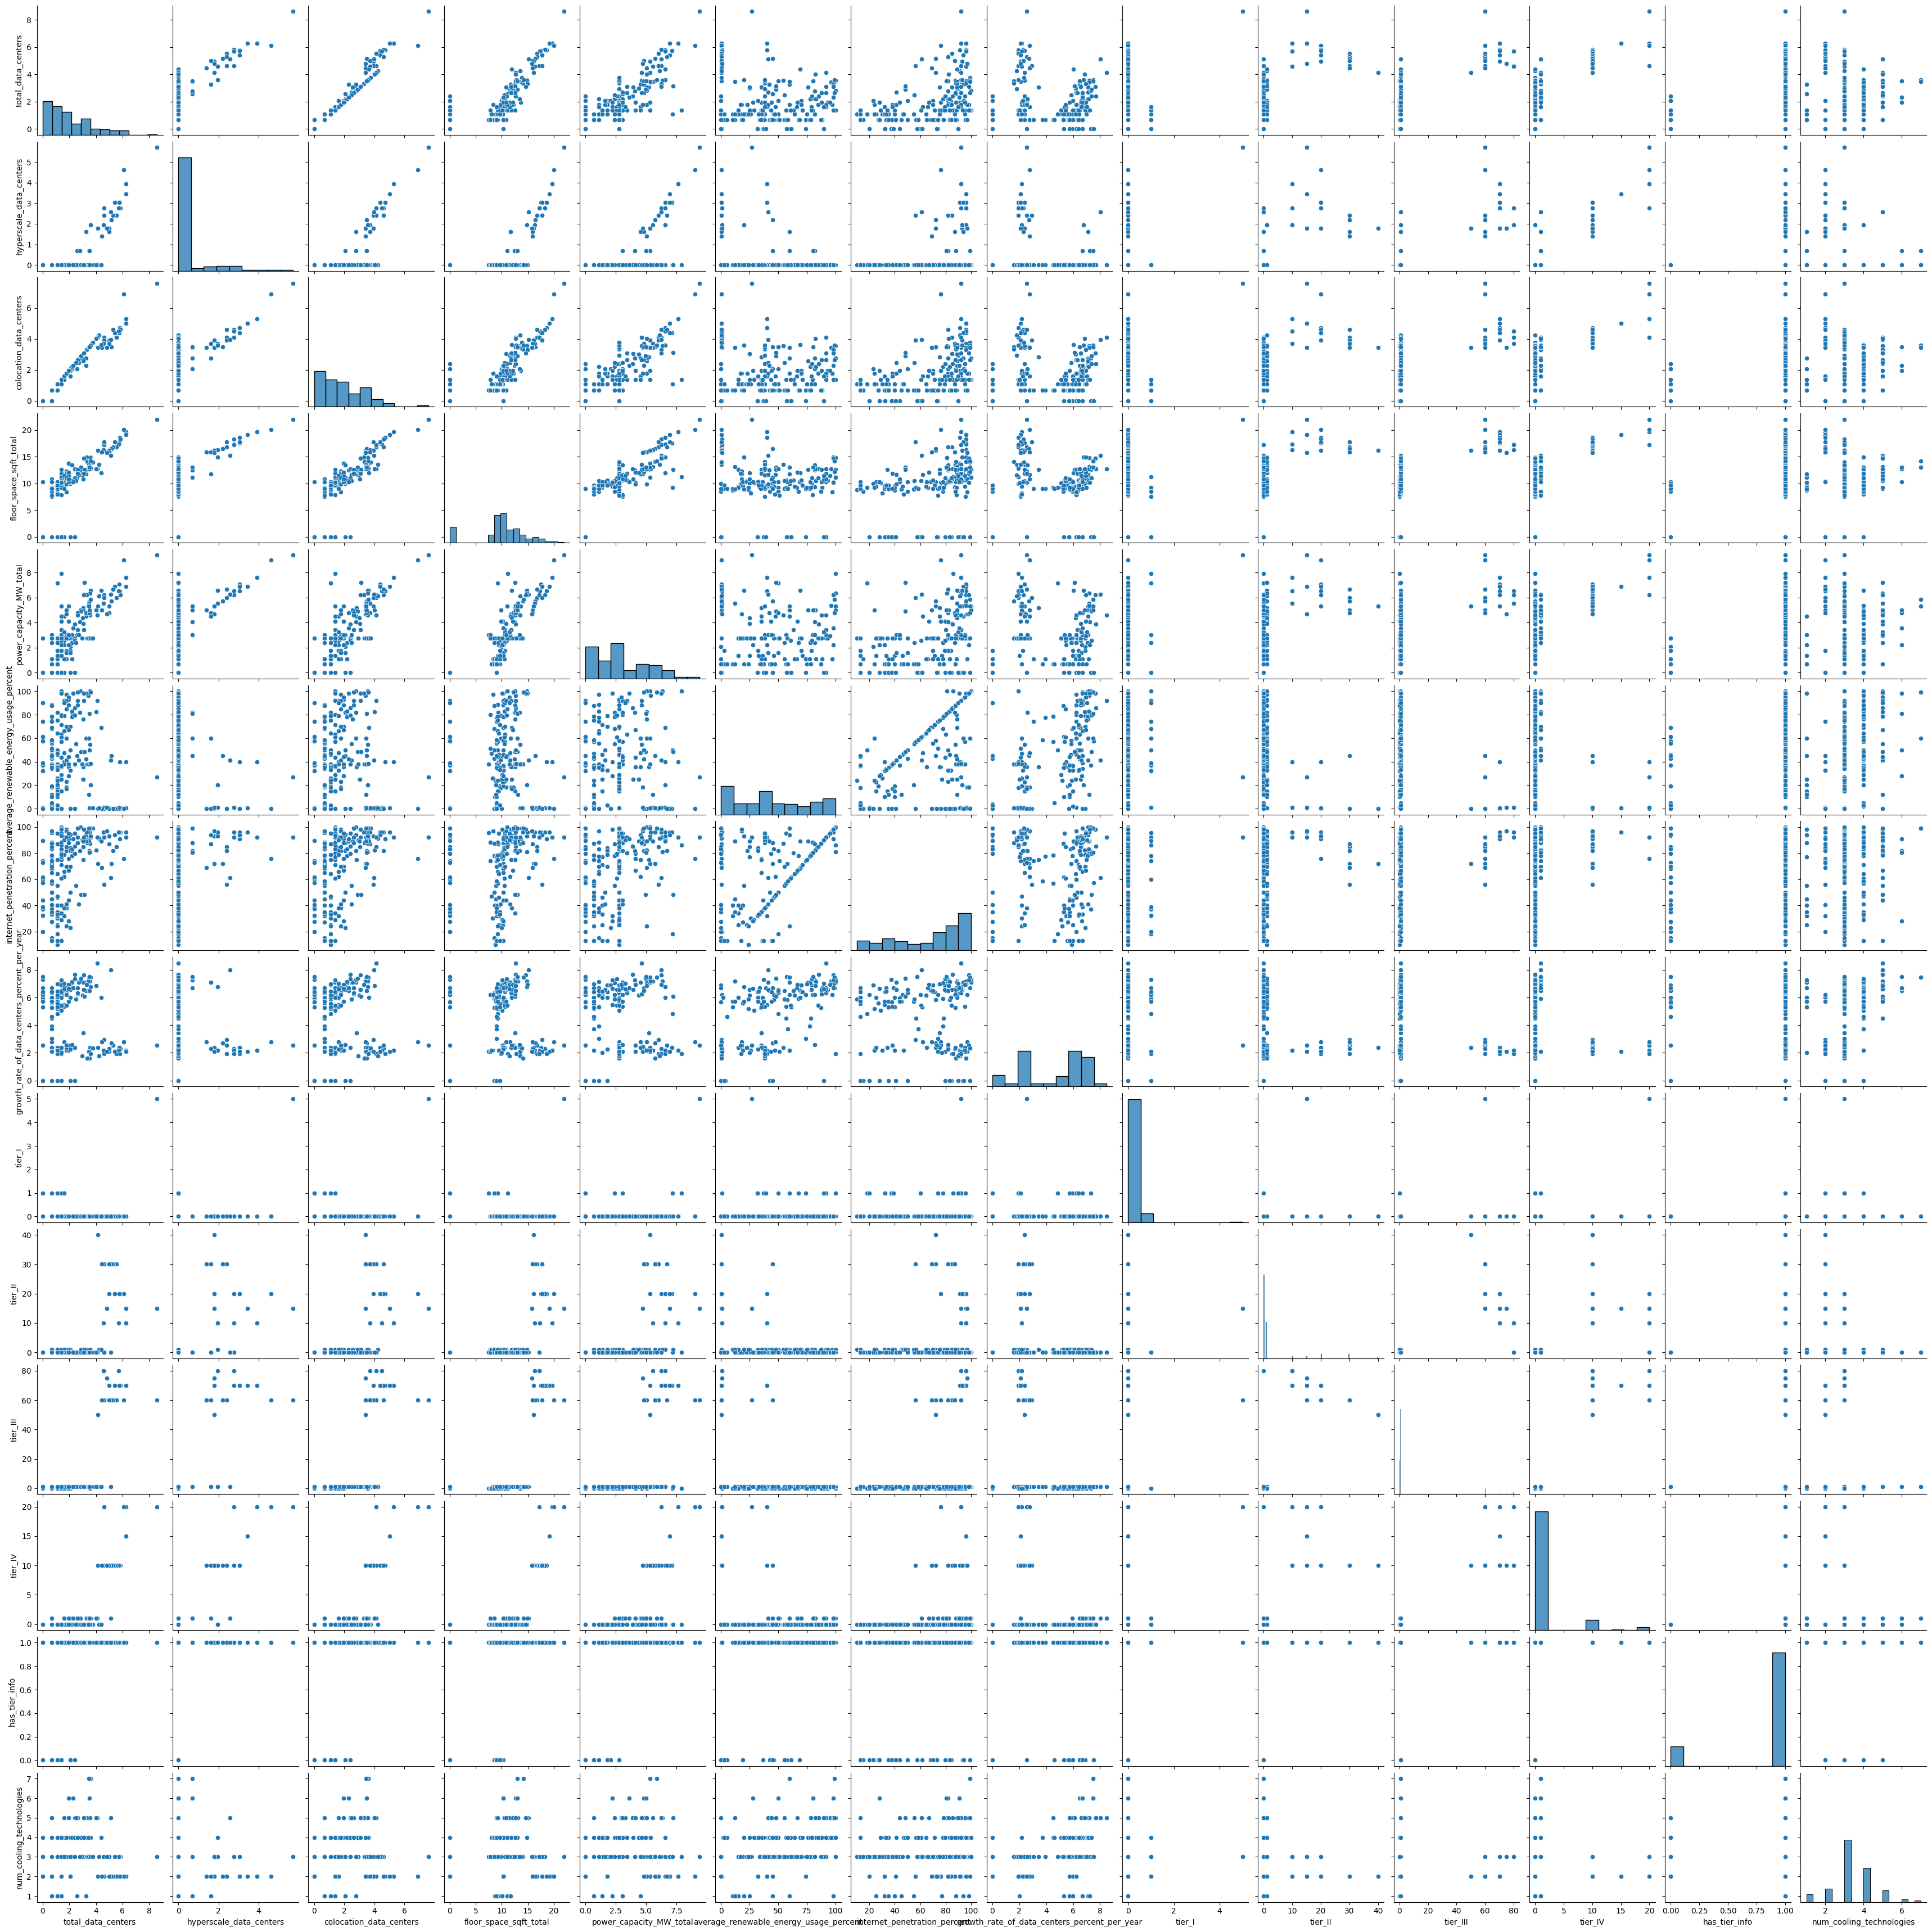

In [32]:
sns.pairplot(check)